In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Load dataset into dataframe
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_cleaned.csv')

In [3]:
# Select a few columns
selected_columns = ['Age Group', 'Perpetrator Sex', 'Perpetrator Race', 'Offense Level']

# Subset the data
df_subset = df[selected_columns]

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df_subset, columns=['Age Group', 'Perpetrator Sex', 'Perpetrator Race'])

# Split the dataset into training and testing sets
X = df_encoded.drop(columns=['Offense Level'])
y = df_encoded['Offense Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest classifier to the training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate the confusion matrix of the model
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{confusion_mat}')

# Interpret the feature importances of the model
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)


Accuracy: 0.5607427211563887
Confusion Matrix: 
[[    0     9     0    87     0]
 [    0  2052     0 13202     0]
 [    0     4     0    52     0]
 [    0  1445     0 17034     0]
 [    0    13     0   139     0]]
                                            Feature  Importance
4                                     Age Group_<18    0.304756
0                                   Age Group_18-24    0.102841
9                            Perpetrator Race_BLACK    0.101807
2                                   Age Group_45-64    0.097948
5                            Perpetrator Sex_Female    0.078186
12                           Perpetrator Race_WHITE    0.076225
6                              Perpetrator Sex_Male    0.071308
1                                   Age Group_25-44    0.060510
3                                     Age Group_65+    0.036644
13                  Perpetrator Race_WHITE HISPANIC    0.028368
8         Perpetrator Race_ASIAN / PACIFIC ISLANDER    0.015711
10                

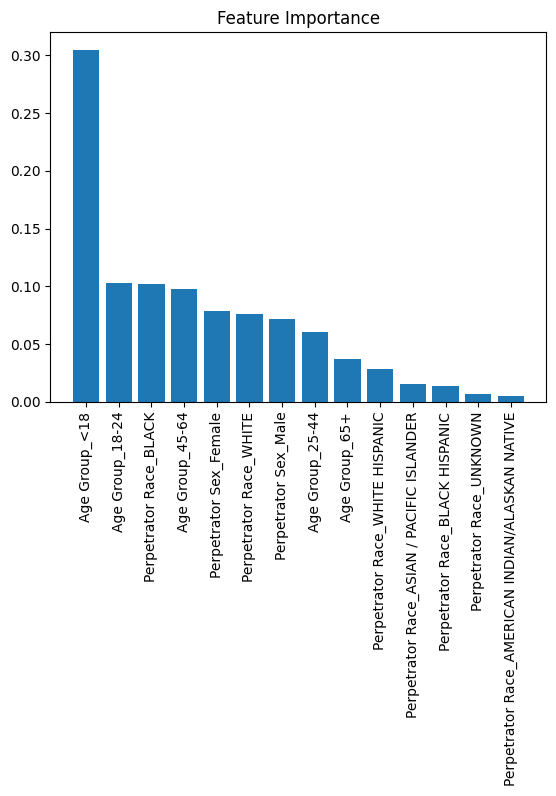

In [4]:

feature_importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names based on feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), feature_importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()